### Datasetlink: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [29]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install tensorflow

  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached flatbuffers-2.0.7-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


print(tf.__version__)

print(keras.__version__)

2.10.0
2.10.0


#### Sequential Model

The Sequential model is a linear stack of layers. The common architecture of ConvNets is a sequential architecture. However, some architectures are not linear stacks. For example, siamese networks are two parallel neural networks with some shared layers.
##### Sequential layer
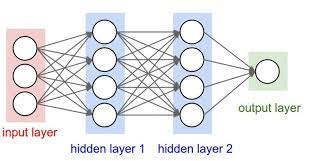

##### Non sequential layer(siamese network)
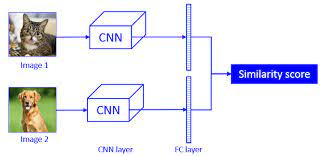

In [5]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization, Flatten

### Loading the data

In [6]:
df=pd.read_csv('creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Preprocessing the data

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# shuffle the DataFrame rows
#df = df.sample(frac = 1)

In [12]:
#Randomly selecting 700 rows of class zero from dataframe due to class imbalance
df_class_zero=df.query("Class==0").sample(n=700)

In [13]:
#Randomly selecting 492 rows of class one from dataframe 
df_class_one=df.query("Class==1").sample(n=492)

In [14]:
df_balance = pd.concat([df_class_zero, df_class_one])

In [15]:
df_balance['Class'].value_counts()

0    700
1    492
Name: Class, dtype: int64

In [16]:
targetdata=df_balance['Class']
inputdata=df_balance.drop(['Class'],axis=1)

In [22]:
inputdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100500,67534.0,-0.680833,0.867928,1.468421,-0.676901,0.305841,-0.399651,0.841581,-0.244524,0.342230,...,0.102962,-0.231607,-0.370029,0.063647,0.158414,-0.592319,-0.181073,-0.241231,-0.286913,1.79
164686,116914.0,-0.226832,0.968366,0.039154,-0.840769,0.633305,-0.574135,0.949804,-0.058904,-0.158878,...,0.142302,-0.260937,-0.514962,0.019349,-0.403240,-0.398217,0.148468,0.359045,0.143284,14.98
211955,138645.0,0.615443,-4.347999,-1.183140,-0.731384,-2.524348,0.405874,-0.609258,-0.009463,-0.632307,...,1.153005,-0.030750,-1.338698,-0.305060,-0.436405,-0.856304,-0.551540,-0.108636,0.089558,835.00
10041,15164.0,1.065728,-0.018064,1.421460,1.383117,-0.660846,0.638046,-0.824427,0.289575,1.901178,...,-0.189011,-0.131392,0.073421,0.020929,-0.043062,0.290715,-0.435356,0.058613,0.018731,11.50
149351,91067.0,1.854128,-0.259803,-0.131587,1.597086,-0.680478,-0.528059,-0.559532,-0.104592,2.338812,...,-0.247910,0.096196,0.509863,0.114933,-0.055402,-0.168010,-0.605280,0.013273,-0.028712,61.00


In [19]:
targetdata.info()

<class 'pandas.core.series.Series'>
Int64Index: 1192 entries, 100500 to 238466
Series name: Class
Non-Null Count  Dtype
--------------  -----
1192 non-null   int64
dtypes: int64(1)
memory usage: 18.6 KB


#### Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

input_data_scaled = pd.DataFrame(scaler.fit_transform(inputdata),columns = inputdata.columns)

In [27]:
input_data_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.391747,0.907856,0.632597,0.949980,0.224280,0.550421,0.484797,0.710319,0.668284,0.819082,...,0.580982,0.451316,0.493767,0.586927,0.666970,0.475290,0.268461,0.460227,0.637947,0.000436
1,0.678425,0.921531,0.634338,0.908295,0.214343,0.558463,0.478271,0.712050,0.671325,0.789288,...,0.582487,0.450729,0.485365,0.585581,0.495638,0.497311,0.350841,0.499568,0.701115,0.003650
2,0.804585,0.946901,0.542159,0.872646,0.220976,0.480911,0.514928,0.687108,0.672134,0.761140,...,0.621141,0.455333,0.437609,0.575724,0.485522,0.445340,0.175849,0.468917,0.693226,0.203472
3,0.087710,0.960464,0.617235,0.948611,0.349206,0.526679,0.523613,0.683665,0.677033,0.911771,...,0.569815,0.453320,0.519476,0.585629,0.605510,0.575473,0.204893,0.479878,0.682826,0.002802
4,0.528369,0.984211,0.613043,0.903315,0.362182,0.526197,0.479994,0.687903,0.670576,0.937791,...,0.567563,0.457872,0.544778,0.588485,0.601746,0.523429,0.162415,0.476906,0.675860,0.014864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0.831924,0.962048,0.653516,0.795230,0.595717,0.544673,0.461574,0.667920,0.680835,0.677882,...,0.583298,0.461745,0.505206,0.584327,0.503777,0.564366,0.342251,0.508871,0.718184,0.000244
1188,0.328408,0.690367,0.664717,0.677156,0.650312,0.408318,0.487288,0.557949,0.691362,0.528659,...,0.553534,0.457503,0.578553,0.594719,0.486059,0.499300,0.367130,0.503800,0.664634,0.037395
1189,0.166445,0.028466,0.902501,0.015895,0.659865,0.010803,0.314950,0.375581,0.993130,0.585199,...,0.643009,0.492207,0.385806,0.542068,0.673168,0.787101,0.261383,0.558330,0.733601,0.024366
1190,0.438464,0.842026,0.658241,0.788937,0.506893,0.457854,0.451832,0.625265,0.692218,0.661401,...,0.587371,0.476942,0.542806,0.597282,0.704679,0.484981,0.220796,0.516359,0.798006,0.030345


In [28]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_data_scaled,targetdata,test_size=0.25,random_state=0)

In [38]:
Y_train

54491     0
6334      1
193143    0
209673    0
220725    1
         ..
150660    1
239501    1
276071    1
81509     0
259399    0
Name: Class, Length: 894, dtype: int64

### Model Building using Artificial Neural Networks

#### First model

In [43]:
model1 = Sequential()
model1.add(Dense(512, input_dim = 30, activation= 'relu')) # First Hidden Layer; input layer is implicit
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(1,activation = 'sigmoid')) # Output Layer

In [44]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               15872     
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18,433
Trainable params: 17,409
Non-trainable params: 1,024
_________________________________________________________________


In [45]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [81]:
firstmodel=model1.fit(X_train, Y_train, batch_size = 10, epochs = 10,validation_data=(X_test, Y_test))

Epoch 1/10
90/90 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9329 - val_loss: 0.2500 - val_accuracy: 0.8960
Epoch 2/10
90/90 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9374 - val_loss: 0.3640 - val_accuracy: 0.8993
Epoch 3/10
90/90 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9474 - val_loss: 0.3510 - val_accuracy: 0.8993
Epoch 4/10
90/90 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9351 - val_loss: 0.3777 - val_accuracy: 0.9060
Epoch 5/10
90/90 [==============================] - 0s 3ms/step - loss: 0.1841 - accuracy: 0.9329 - val_loss: 0.2339 - val_accuracy: 0.8926
Epoch 6/10
90/90 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9407 - val_loss: 0.2358 - val_accuracy: 0.9161
Epoch 7/10
90/90 [==============================] - 0s 3ms/step - loss: 0.1803 - accuracy: 0.9418 - val_loss: 0.4332 - val_accuracy: 0.8993
Epoch 8/10
90/90 [==

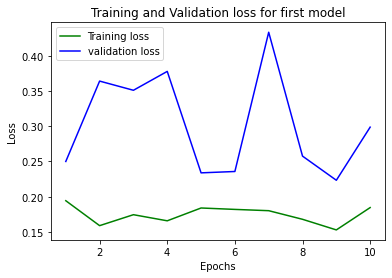

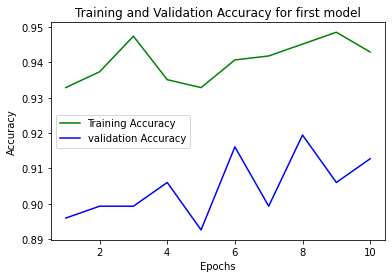

In [87]:

loss_train = firstmodel.history['loss']
loss_val = firstmodel.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for first model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy_train = firstmodel.history['accuracy']
accuracy_val = firstmodel.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy for first model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
# evaluate the keras model
accuracy1=model1.evaluate(X_test, Y_test, verbose=0)
#print('Accuracy: %.2f' % (accuracy*100))
print('Model_one_Accuracy:',accuracy1[1]*100)

Model_one_Accuracy: 91.27516746520996


#### Second model

In [50]:
model2 = Sequential()
model2.add(Dense(512, input_dim = 30, activation= 'relu')) # First Hidden Layer; input layer is implicit
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(400, activation= 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(300, activation= 'relu'))
model2.add(BatchNormalization())
model2.add(Dense(1,activation = 'sigmoid')) # Output Layer

In [86]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
secondmodel=model2.fit(X_train, Y_train, batch_size = 10, epochs = 15,validation_data=(X_test, Y_test))

Epoch 1/15
90/90 [==============================] - 2s 7ms/step - loss: 0.1340 - accuracy: 0.9586 - val_loss: 0.4560 - val_accuracy: 0.7617
Epoch 2/15
90/90 [==============================] - 0s 4ms/step - loss: 0.1136 - accuracy: 0.9597 - val_loss: 0.3963 - val_accuracy: 0.8557
Epoch 3/15
90/90 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9631 - val_loss: 0.3423 - val_accuracy: 0.9228
Epoch 4/15
90/90 [==============================] - 0s 4ms/step - loss: 0.0932 - accuracy: 0.9687 - val_loss: 0.5778 - val_accuracy: 0.9195
Epoch 5/15
90/90 [==============================] - 0s 4ms/step - loss: 0.1267 - accuracy: 0.9519 - val_loss: 0.4830 - val_accuracy: 0.8188
Epoch 6/15
90/90 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.9597 - val_loss: 0.3180 - val_accuracy: 0.9060
Epoch 7/15
90/90 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9631 - val_loss: 0.6216 - val_accuracy: 0.9060
Epoch 8/15
90/90 [==

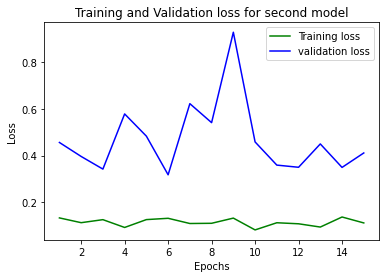

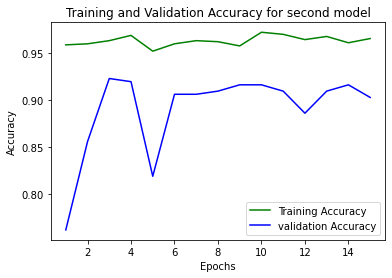

In [89]:

loss_train = secondmodel.history['loss']
loss_val = secondmodel.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for second model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy_train = secondmodel.history['accuracy']
accuracy_val = secondmodel.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy for second model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Third model

In [90]:
model3 = Sequential()
model3.add(Dense(512, input_dim = 30, activation= 'relu')) # First Hidden Layer; input layer is implicit
model3.add(BatchNormalization())
model3.add(Dropout(0.3))
model3.add(Dense(400, activation= 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))
model3.add(Dense(300, activation= 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(250, activation= 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(200, activation= 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(1,activation = 'sigmoid')) # Output Layer

In [95]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
thirdmodel=model3.fit(X_train, Y_train, batch_size = 20, epochs = 20,validation_data=(X_test, Y_test))

Epoch 1/20
45/45 [==============================] - 2s 13ms/step - loss: 0.2759 - accuracy: 0.8949 - val_loss: 0.5903 - val_accuracy: 0.6980
Epoch 2/20
45/45 [==============================] - 0s 6ms/step - loss: 0.2004 - accuracy: 0.9262 - val_loss: 0.4969 - val_accuracy: 0.8087
Epoch 3/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.9306 - val_loss: 0.4216 - val_accuracy: 0.9094
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.2148 - accuracy: 0.9374 - val_loss: 0.6504 - val_accuracy: 0.4295
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1571 - accuracy: 0.9396 - val_loss: 0.6278 - val_accuracy: 0.4564
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1519 - accuracy: 0.9485 - val_loss: 0.5804 - val_accuracy: 0.5034
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1376 - accuracy: 0.9530 - val_loss: 1.0696 - val_accuracy: 0.4295
Epoch 8/20
45/45 [=

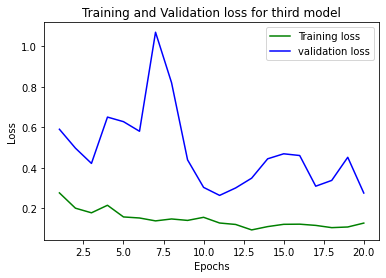

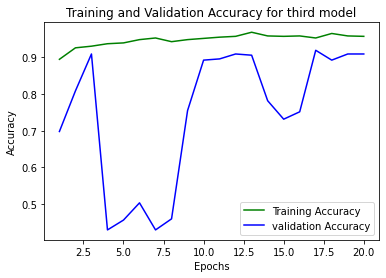

In [96]:

loss_train = thirdmodel.history['loss']
loss_val = thirdmodel.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for third model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy_train = thirdmodel.history['accuracy']
accuracy_val = thirdmodel.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy for third model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### fourth model

In [94]:
model4 = Sequential()
model4.add(Dense(512, input_dim = 30, activation= 'relu')) # First Hidden Layer; input layer is implicit
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(400, activation= 'relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(300, activation= 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(250, activation= 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(200, activation= 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(150, activation= 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(100, activation= 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(1,activation = 'sigmoid')) # Output Layer

In [98]:
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
fourthmodel=model4.fit(X_train, Y_train, batch_size = 25, epochs = 25,validation_data=(X_test, Y_test))

Epoch 1/25
36/36 [==============================] - 3s 17ms/step - loss: 0.1126 - accuracy: 0.9597 - val_loss: 0.6544 - val_accuracy: 0.8993
Epoch 2/25
36/36 [==============================] - 0s 8ms/step - loss: 0.0873 - accuracy: 0.9664 - val_loss: 0.7361 - val_accuracy: 0.9161
Epoch 3/25
36/36 [==============================] - 0s 7ms/step - loss: 0.1102 - accuracy: 0.9541 - val_loss: 0.5021 - val_accuracy: 0.9128
Epoch 4/25
36/36 [==============================] - 0s 8ms/step - loss: 0.0852 - accuracy: 0.9709 - val_loss: 0.4150 - val_accuracy: 0.9195
Epoch 5/25
36/36 [==============================] - 0s 8ms/step - loss: 0.0937 - accuracy: 0.9676 - val_loss: 0.4489 - val_accuracy: 0.8993
Epoch 6/25
36/36 [==============================] - 0s 8ms/step - loss: 0.1348 - accuracy: 0.9564 - val_loss: 0.4235 - val_accuracy: 0.9195
Epoch 7/25
36/36 [==============================] - 0s 7ms/step - loss: 0.1039 - accuracy: 0.9642 - val_loss: 0.3601 - val_accuracy: 0.9060
Epoch 8/25
36/36 [=

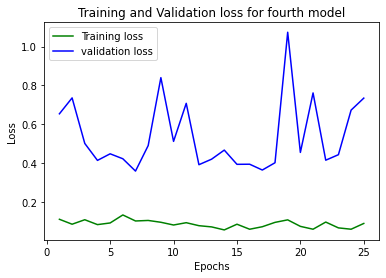

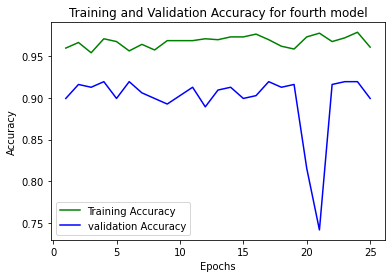

In [99]:
loss_train = fourthmodel.history['loss']
loss_val = fourthmodel.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for fourth model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy_train = fourthmodel.history['accuracy']
accuracy_val = fourthmodel.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy for fourth model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### fifth model

In [100]:
model5 = Sequential()
model5.add(Dense(512, input_dim = 30, activation= 'relu')) # First Hidden Layer; input layer is implicit
model5.add(BatchNormalization())
model5.add(Dropout(0.3))
model5.add(Dense(400, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))
model5.add(Dense(300, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dense(250, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dense(200, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dense(150, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dense(100, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dense(50, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dense(10, activation= 'relu'))
model5.add(BatchNormalization())
model5.add(Dense(1,activation = 'sigmoid')) # Output Layer

In [102]:
# Just for change used "SGD" optimizer instead of "adam"
model5.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
fifthmodel=model5.fit(X_train, Y_train, batch_size = 30, epochs = 30,validation_data=(X_test, Y_test))

Epoch 1/30
30/30 [==============================] - 4s 21ms/step - loss: 0.1266 - accuracy: 0.9631 - val_loss: 0.2943 - val_accuracy: 0.9161
Epoch 2/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1413 - accuracy: 0.9418 - val_loss: 0.2590 - val_accuracy: 0.9195
Epoch 3/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1285 - accuracy: 0.9586 - val_loss: 0.2816 - val_accuracy: 0.9195
Epoch 4/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1232 - accuracy: 0.9609 - val_loss: 0.2806 - val_accuracy: 0.9195
Epoch 5/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1338 - accuracy: 0.9541 - val_loss: 0.2831 - val_accuracy: 0.9128
Epoch 6/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1373 - accuracy: 0.9497 - val_loss: 0.2704 - val_accuracy: 0.9128
Epoch 7/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1282 - accuracy: 0.9485 - val_loss: 0.2772 - val_accuracy: 0.9128
Epoch 8/30
30/30 [=

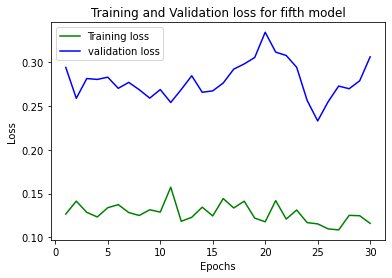

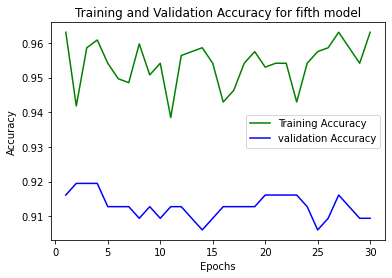

In [104]:
loss_train = fifthmodel.history['loss']
loss_val = fifthmodel.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for fifth model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy_train = fifthmodel.history['accuracy']
accuracy_val = fifthmodel.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy for fifth model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()